<a href="https://colab.research.google.com/github/ErialdoDFreitas/som-networks-and-knn-implementations/blob/main/SOM_Networks_Examples_Erialdo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=b5b8088b14406983b375bea334454e8c66b9a099fce2386559ec61d6c59c6d5d
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


## Exemplo Básico para processamento de imagem (identificando as cores que compõe a imagem)

In [ ]:
import sys
sys.path.insert(0, '../')
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [ ]:
# lendo a imagem
img = plt.imread('image1.jpg')

# fazendo reshaping da matriz de pixels
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3) )

# visualizando os pixels
print(pixels)

FileNotFoundError: [Errno 2] No such file or directory: 'image1.jpg'

### Análise dos dados da imagem

In [ ]:
print("img.shape: ", img.shape)
print("pixels.shape", pixels.shape)
print("\n")
pixels.shape[0] * pixels.shape[1]

In [ ]:
pixels = pixels / 255

In [ ]:
img.shape

In [ ]:
assert not np.any(np.isnan(pixels)), 'Há valores NaNs nos pixels'
assert np.all(pixels >= 0) and np.all(pixels <= 1), 'Os valores dos pixels devem está entre 0 e 1'

### Execução da implementação do algoritmo e visualização dos resultados

In [ ]:
# Inicialização da Rede SOM
som = MiniSom(7, 7, 3, sigma=1., learning_rate=0.2, neighborhood_function='bubble')

# Treinamento da rede
print("Treinando...")
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy() # salvando uma cópia os pesos iniciais
som.train_random(pixels, 500)

print('quantização...')
qnt = som.quantization(pixels) # quantizando cada pixels da imagem

print('Criando nova imagem...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt): # Colocando os valores quantizados na nova imagem
    clustered[np.unravel_index(i, (img.shape[0], img.shape[1]))] = q
print('Concluído.')

In [ ]:
clustered.shape

In [ ]:
plt.imshow(clustered, vmin=0, vmax=64)

In [ ]:
# Mostrando (plotting) os resultados
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('Imagem Original')
plt.imshow(img)
plt.subplot(222)
plt.title('Resultado (Imagem quantizada)')
plt.imshow(clustered)

plt.subplot(223)
plt.title('Pesos (Cores) iniciais')
plt.imshow(starting_weights)
plt.subplot(224)
plt.title('Pesos finais (Cores aprendidas)')
plt.imshow(som.get_weights())

plt.tight_layout()
plt.show()

## Redes SOM com dataset Iris


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from minisom import MiniSom
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

#pegando data, do dataset e já fazendo a normalização para valores entre 0 e 1
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, iris.data)

In [ ]:
type(data)

In [ ]:
features_names = iris.feature_names
classes_names = iris.target_names
iris_target = iris.target

df_iris = pd.DataFrame(data, columns=features_names)
df_iris["class_id"] = iris_target
df_iris["class"] = 0 # Inicialmente como um tipo numérico

# Convertendo a coluna "class" para o tipo 'object' para suportar strings
df_iris["class"] = df_iris["class"].astype(object)

# Criando identificadores das classes numéricas (0, 1, 2)
df_iris.loc[df_iris["class_id"]==0, 'class'] = str(classes_names[0])
df_iris.loc[df_iris["class_id"]==1, 'class'] = str(classes_names[1])
df_iris.loc[df_iris["class_id"]==2, 'class'] = str(classes_names[2])

In [ ]:
classes_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
sns.pairplot(df_iris.drop("class_id", axis=1), hue="class", height=3, diag_kind="kde")

#### Iniciando Rede SOM e logo em seguida executando treinamento

In [ ]:
# Inicialização usando três tipos diferentes tamanhos de redes

som3x3 = MiniSom(x=3, y=3, input_len=4, sigma=3, learning_rate=0.5, neighborhood_function="triangle", random_seed=10)
som7x7 = MiniSom(x=7, y=7, input_len=4, sigma=3, learning_rate=0.5, neighborhood_function="triangle", random_seed=10)
som9x9 = MiniSom(x=9, y=9, input_len=4, sigma=3, learning_rate=0.5, neighborhood_function="triangle", random_seed=10)

In [ ]:
# Executando treinamento

# 3x3 com random_weights e training
som3x3.random_weights_init(data)
som3x3.train_random(data, 1000, verbose=True)

# 7x7 com random_weights e training
som7x7.random_weights_init(data)
som7x7.train_random(data, 1000, verbose=True)

# 9x9 com random_weights_init(data)
som9x9.random_weights_init(data)
som9x9.train_random(data, 1000, verbose=True)


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.03430572474750556
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.01584046569224153
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.011805138165357953


#### Plotando gráficos

##### Hitmap (mapa de acertos)

In [ ]:
import matplotlib.patches as mpatches

target = np.zeros(len(iris_target), dtype=int)
target[iris_target==0] = 0
target[iris_target==1] = 1
target[iris_target==2] = 2

# Usando diferentes cores e marcações para cada label
colors = ['r', 'g', 'b']
markers = ['o', 's', '^']

red_patch = mpatches.Patch(color='red', label='setosa')
green_patch = mpatches.Patch(color='green', label='virginica')
blue_patch = mpatches.Patch(color='blue', label='versicolor')

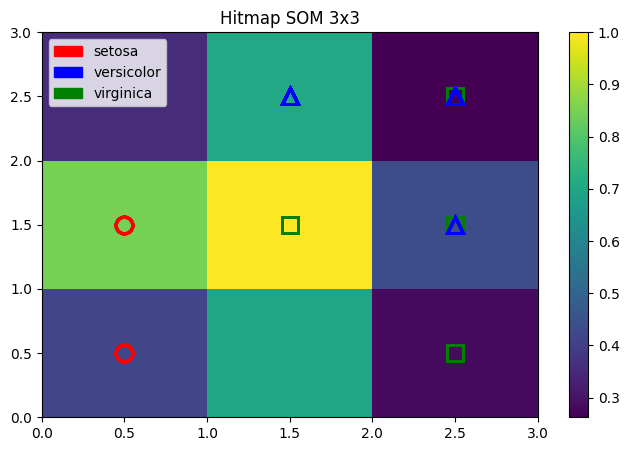

In [ ]:
# Plotando Hitmap da rede SOM 3x3

plt.figure(figsize=(8, 5))
plt.title('Hitmap SOM 3x3')
plt.pcolor(som3x3.distance_map().T) # mapa de distância como background
plt.colorbar()

for cnt, xx in enumerate(data):
  w = som3x3.winner(xx) # pegando o vencedor (winner)
  plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor='None',
           markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)

plt.axis([0, som3x3.get_weights().shape[0], 0, som3x3.get_weights().shape[1]])
plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.show()

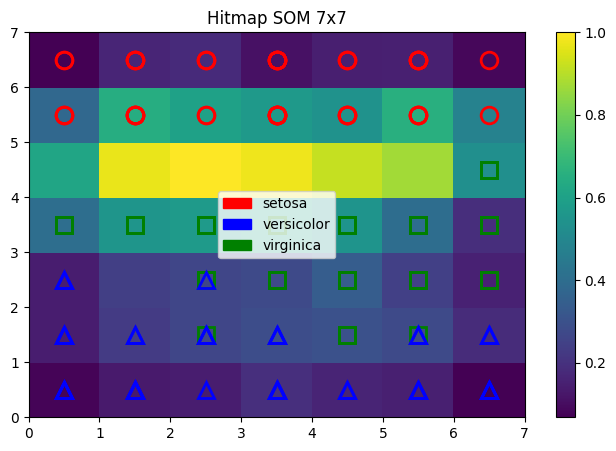

In [ ]:
# Plotando Hitmap da rede SOM 7x7

plt.figure(figsize=(8, 5))
plt.title('Hitmap SOM 7x7')
plt.pcolor(som7x7.distance_map().T) # mapa de distância como background
plt.colorbar()

for cnt, xx in enumerate(data):
  w = som7x7.winner(xx) # pegando o vencedor (winner)
  plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor='None',
           markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)

plt.axis([0, som7x7.get_weights().shape[0], 0, som7x7.get_weights().shape[1]])
plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.show()

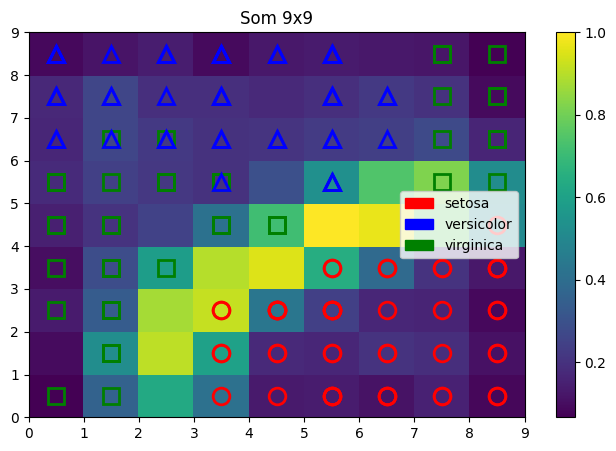

In [ ]:
# Plotando Hitmap da rede SOM 9x9

plt.figure(figsize=(8,5))
plt.title('Som 9x9')
plt.pcolor(som9x9.distance_map().T) # mapa de distância como background
plt.colorbar()

for cnt,xx in enumerate(data):
    w = som9x9.winner(xx) # getting the winner
    plt.plot(w[0]+.5,w[1]+.5,markers[target[cnt]],markerfacecolor='None',
             markeredgecolor=colors[target[cnt]],markersize=12,markeredgewidth=2)

plt.axis([0,som9x9.get_weights().shape[0],0,som9x9.get_weights().shape[1]])
plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.show()

In [ ]:
classes_names[0]

'setosa'

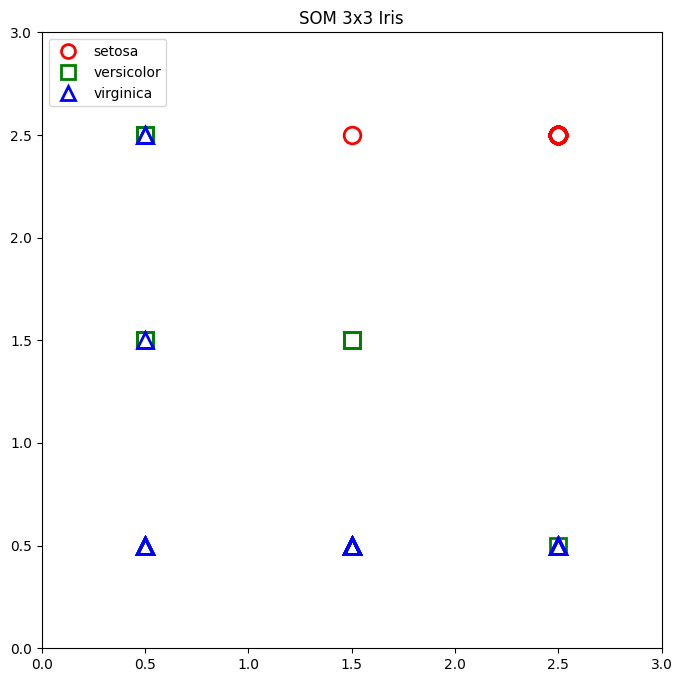

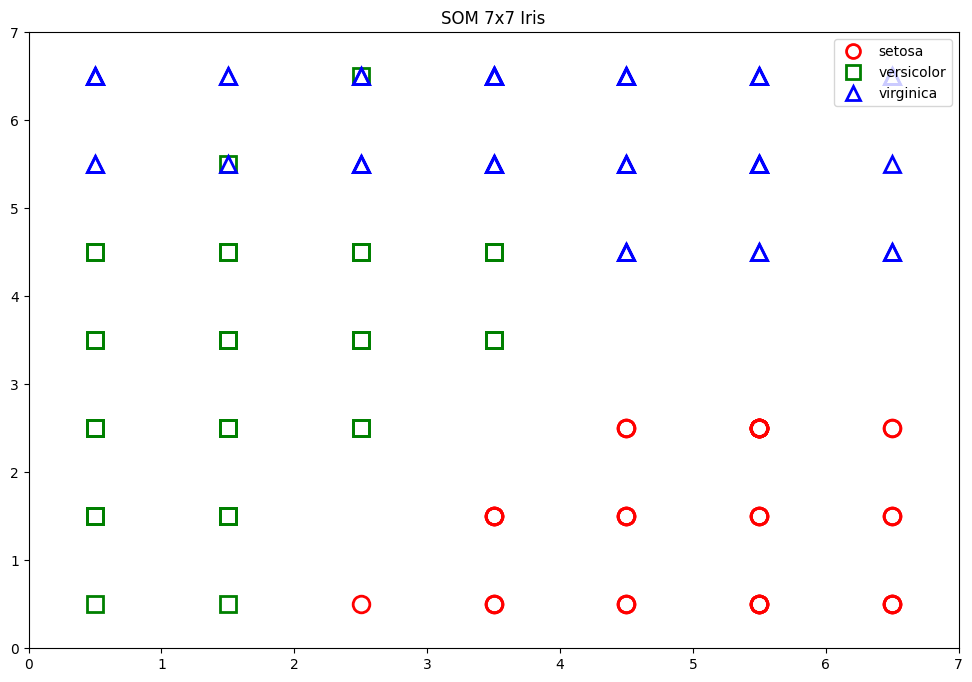

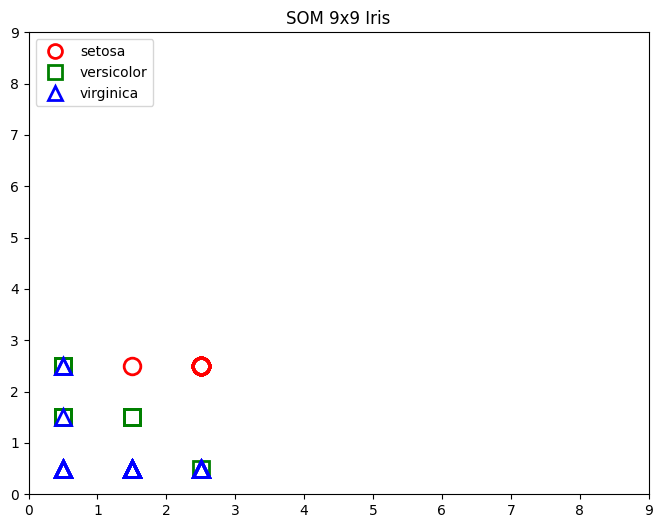

In [ ]:
# Outro tipo de Hitmap
from matplotlib.lines import Line2D

# Rede SOM 3x3
plt.figure(figsize=(8, 8))
plt.title('SOM 3x3 Iris')

# Definir os símbolos (marcadores) para cada classe
markers = ['o', 's', '^']  # círculos, quadrados, triângulos
colors = ['r', 'g', 'b']   # cores: vermelho, verde, azul

# Definindo um dicionário para mapear as classes para as cores
for x, t in zip(data, iris_target):  # scatterplot
    w = som3x3.winner(x)  # encontrar o neurônio vencedor
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[t],  # escolher o marcador com base na classe
             markerfacecolor='None', markeredgecolor=colors[t], markersize=12, markeredgewidth=2)

# Criando os objetos para a legenda (círculo, quadrado e triângulo)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=classes_names[0], markerfacecolor='None', markeredgecolor='r', markersize=10, markeredgewidth=2),
    Line2D([0], [0], marker='s', color='w', label=classes_names[1], markerfacecolor='None', markeredgecolor='g', markersize=10, markeredgewidth=2),
    Line2D([0], [0], marker='^', color='w', label=classes_names[2], markerfacecolor='None', markeredgecolor='b', markersize=10, markeredgewidth=2)
]

# Adicionar a legenda ao gráfico
plt.legend(handles=legend_elements, loc='upper left')
plt.axis([0, som3x3.get_weights().shape[0], 0, som3x3.get_weights().shape[1]])
plt.show()
print("\n")

# Rede SOM 7x7
# plt.figure(figsize=(12, 8))
# plt.title('SOM 7x7 Iris')
# wmap = {}
# im = 0
# # Definindo um dicionário para mapear as classes para as cores
# for x, t in zip(data, iris_target):  # scatterplot
#     w = som7x7.winner(x)  # encontrar o neurônio vencedor
#     wmap[w] = im
#     plt.text(w[0] + .5, w[1] + .5, classes_names[t],  # nome da classe ('setosa', 'versicolor', 'virginica')
#              color=plt.cm.rainbow(t / 3.), fontdict={'weight': 'bold', 'size': 11})
#     im += 1

# plt.axis([0, som7x7.get_weights().shape[0], 0, som7x7.get_weights().shape[1]])
# plt.show()
plt.figure(figsize=(12, 8))
plt.title('SOM 7x7 Iris')

for x, t in zip(data, iris_target):  # scatterplot
    w = som7x7.winner(x)  # encontrar o neurônio vencedor
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[t],  # escolher o marcador com base na classe
             markerfacecolor='None', markeredgecolor=colors[t], markersize=12, markeredgewidth=2)

# Criando os objetos para a legenda (círculo, quadrado e triângulo)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=classes_names[0], markerfacecolor='None', markeredgecolor='r', markersize=10, markeredgewidth=2),
    Line2D([0], [0], marker='s', color='w', label=classes_names[1], markerfacecolor='None', markeredgecolor='g', markersize=10, markeredgewidth=2),
    Line2D([0], [0], marker='^', color='w', label=classes_names[2], markerfacecolor='None', markeredgecolor='b', markersize=10, markeredgewidth=2)
]

# Adicionar a legenda ao gráfico
plt.legend(handles=legend_elements, loc='upper right')
plt.axis([0, som7x7.get_weights().shape[0], 0, som7x7.get_weights().shape[1]])
plt.show()
print("\n")


# Rede SOM 9x9
plt.figure(figsize=(8, 6))
plt.title('SOM 9x9 Iris')

# Definir os símbolos (marcadores) para cada classe
markers = ['o', 's', '^']  # círculos, quadrados, triângulos
colors = ['r', 'g', 'b']   # cores: vermelho, verde, azul

# Definindo um dicionário para mapear as classes para as cores
for x, t in zip(data, iris_target):  # scatterplot
    w = som3x3.winner(x)  # encontrar o neurônio vencedor
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[t],  # escolher o marcador com base na classe
             markerfacecolor='None', markeredgecolor=colors[t], markersize=12, markeredgewidth=2)

# Criando os objetos para a legenda (círculo, quadrado e triângulo)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=classes_names[0], markerfacecolor='None', markeredgecolor='r', markersize=10, markeredgewidth=2),
    Line2D([0], [0], marker='s', color='w', label=classes_names[1], markerfacecolor='None', markeredgecolor='g', markersize=10, markeredgewidth=2),
    Line2D([0], [0], marker='^', color='w', label=classes_names[2], markerfacecolor='None', markeredgecolor='b', markersize=10, markeredgewidth=2)
]

# Adicionar a legenda ao gráfico
plt.legend(handles=legend_elements, loc='upper left')
plt.axis([0, som9x9.get_weights().shape[0], 0, som9x9.get_weights().shape[1]])
plt.show()

##### Heatmap

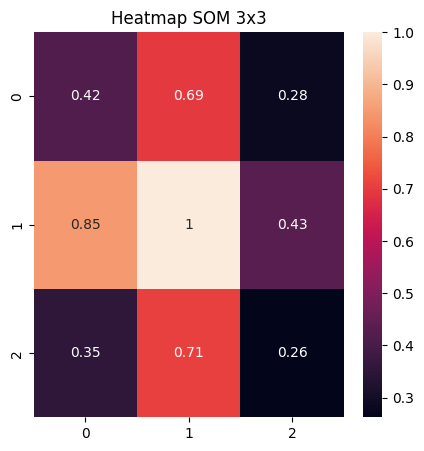

In [ ]:
# Heatmap SOM 3x3

plt.figure(figsize=(5, 5))
plt.title('Heatmap SOM 3x3')
sns.heatmap(som3x3.distance_map().T, annot=True)
plt.show()

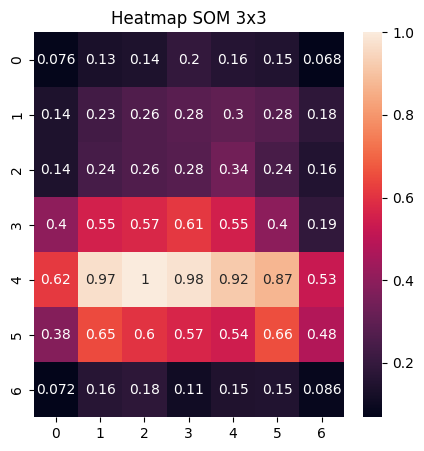

In [ ]:
# Heatmap SOM 7x7

plt.figure(figsize=(5, 5))
plt.title('Heatmap SOM 3x3')
sns.heatmap(som7x7.distance_map().T, annot=True)
plt.show()

##### Outros tipos de gráficos

#### Erros de Quantização

iteration=13999 status=100.00% error=0.03336682196853072

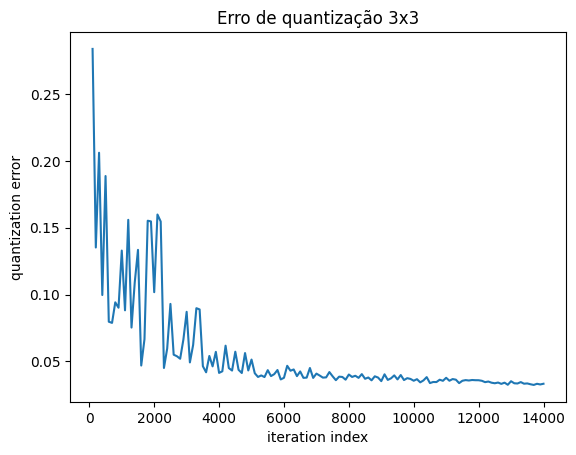



iteration=13999 status=100.00% error=0.013496583949399147

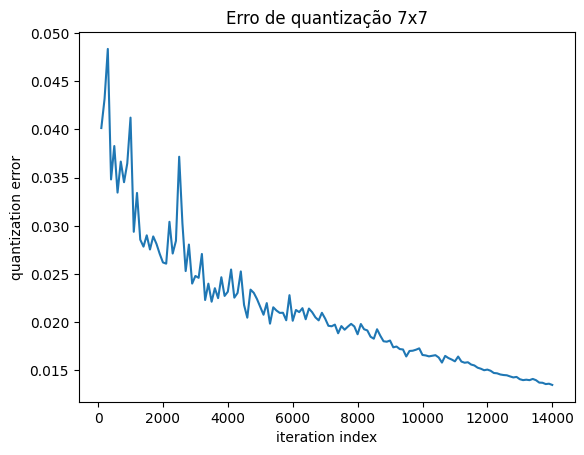



iteration=13999 status=100.00% error=0.008662073330449924

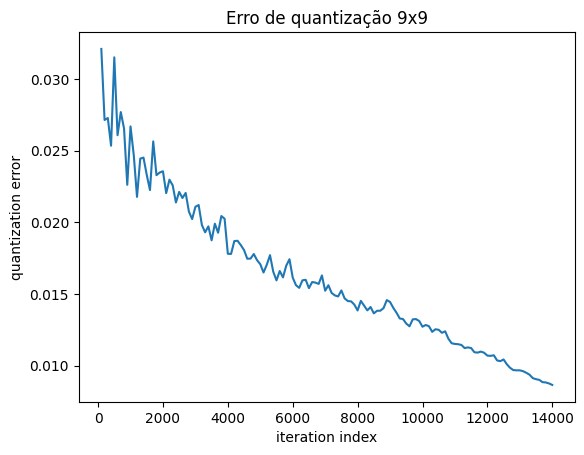

In [ ]:
# Cálculo e plotagem de gráfico dos erros de quantização
max_iter = 14000

# SOM 3x3
som3x3.random_weights_init(data)
q_error_random_init = []
iter_x = []
for i in range(max_iter):
    percent = 100*(i+1)/max_iter
    rand_i = np.random.randint(len(data)) # Corresponde ao treinamento randomico
    som3x3.update(data[rand_i], som3x3.winner(data[rand_i]), i, max_iter)
    if (i+1) % 100 == 0:
        error = som3x3.quantization_error(data)
        q_error_random_init.append(error)
        iter_x.append(i)
        sys.stdout.write(f'\riteration={i:2d} status={percent:0.2f}% error={error}')

plt.title('Erro de quantização 3x3')
plt.plot(iter_x, q_error_random_init)
plt.ylabel('quantization error')
plt.xlabel('iteration index')
plt.show()
print("\n")

# SOM 7x7
som7x7.random_weights_init(data)
q_error_random_init = []
iter_x = []
for i in range(max_iter):
    percent = 100*(i+1)/max_iter
    rand_i = np.random.randint(len(data)) # Corresponde ao treinamento randomico
    som7x7.update(data[rand_i], som7x7.winner(data[rand_i]), i, max_iter)
    if (i+1) % 100 == 0:
        error = som7x7.quantization_error(data)
        q_error_random_init.append(error)
        iter_x.append(i)
        sys.stdout.write(f'\riteration={i:2d} status={percent:0.2f}% error={error}')

plt.title('Erro de quantização 7x7')
plt.plot(iter_x, q_error_random_init)
plt.ylabel('quantization error')
plt.xlabel('iteration index')
plt.show()
print("\n")


# SOM 9x9
som9x9.random_weights_init(data)
q_error_random_init = []
iter_x = []
for i in range(max_iter):
    percent = 100*(i+1)/max_iter
    rand_i = np.random.randint(len(data)) # Corresponde ao treinamento randomico
    som9x9.update(data[rand_i], som9x9.winner(data[rand_i]), i, max_iter)
    if (i+1) % 100 == 0:
        error = som9x9.quantization_error(data)
        q_error_random_init.append(error)
        iter_x.append(i)
        sys.stdout.write(f'\riteration={i:2d} status={percent:0.2f}% error={error}')

plt.title('Erro de quantização 9x9')
plt.plot(iter_x, q_error_random_init)
plt.ylabel('quantization error')
plt.xlabel('iteration index')
plt.show()

iteration=999 status=7.14% 
iteration=1999 status=14.29% 
iteration=2999 status=21.43% 
iteration=3999 status=28.57% 
iteration=4999 status=35.71% 
iteration=5999 status=42.86% 
iteration=6999 status=50.00% 
iteration=7999 status=57.14% 
iteration=8999 status=64.29% 
iteration=9999 status=71.43% 
iteration=10999 status=78.57% 
iteration=11999 status=85.71% 
iteration=12999 status=92.86% 
iteration=13999 status=100.00% 


<function matplotlib.pyplot.show(close=None, block=None)>

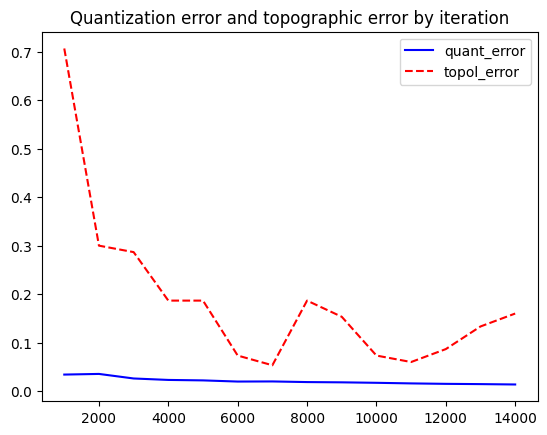

In [ ]:
print('\n')


# SOM 7x7
quant_error = []
topol_error = []
iter_x = []

for i in range(max_iter):
    percent = 100*(i+1)/max_iter
    rand_i = np.random.randint(len(data)) # This corresponds to train_random() method.
    som7x7.update(data[rand_i], som7x7.winner(data[rand_i]), i, max_iter)
    if (i+1) % 1000 == 0:
        quant_error.append(som7x7.quantization_error(data))
        topol_error.append(som7x7.topographic_error(data))
        iter_x.append(i)
        sys.stdout.write(f'\riteration={i:2d} status={percent:0.2f}% \n')

fig, ax = plt.subplots()
ax.plot(iter_x, quant_error, 'b', label='quant_error')
ax.plot(iter_x, topol_error, 'r--',  label='topol_error')
ax.set_label('quantization error')
ax.set_label('iteration index')
ax.set_title('Quantization error and topographic error by iteration (SOM 7x7)')
leg = ax.legend()

plt.savefig("Resultats.png")
plt.show